# Table of Contents --> TBU

1. [Merging datasets](#1-bullet) <br>
    I - [Customers and orders](#2-bullet) <br>
    II - [Data and order_items](#3-bullet) <br>
    III - [Data and order_reviews](#4-bullet) <br>
    IV - [Data and order_payments](#5-bullet) <br>
    V - [Translation of products categories](#6-bullet) <br>
    VI - [Data and products](#7-bullet) <br>
    VII - [Data and sellers](#8-bullet) <br>
    <br>
    
2. [Cleaning](#9-bullet) <br>
    I - [Types](#10-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    <br>

3. [xx](#xx-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    <br>
    
4. [xx](#xx-bullet) <br>
    I - [xx](#xx-bullet) <br>
    II - [xx](#xx-bullet) <br>
    III - [xx](#xx-bullet) <br>
    <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from functions import *

In [2]:
# Loading datas

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 50)

# 1. Merging datasets <a class="anchor" id="1-bullet"></a>

We will try to extract all relevant information on customers on one unique dataset

## I - Customers and orders <a class="anchor" id="2-bullet"></a>

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.shape

(99441, 5)

### a. Adding latitude and longitude with geolocation

In [6]:
geolocation.shape

(1000163, 5)

In [7]:
len(geolocation['geolocation_zip_code_prefix'].unique())

19015

In [8]:
geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix')]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,1046,-23.546129,-46.642951,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
# We have several rows for each zip code with more or less the same coordinates, 
# we will create a simplified df with only one row per zip code with the mean value

zip_list = []
latitude_list = []
longitude_list = []

for zip_code in list(geolocation['geolocation_zip_code_prefix'].unique()):
    zip_list.append(zip_code)
    
    latitude = geolocation[geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].mean()
    latitude_list.append(latitude)
    
    longitude = geolocation[geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].mean()
    longitude_list.append(longitude)

In [10]:
# Check we have the right lenght (same as geolocation['geolocation_zip_code_prefix'].unique())
print(len(zip_list))
print(len(latitude_list))
print(len(longitude_list))

19015
19015
19015


In [11]:
simplified_geolocation = pd.DataFrame({'geolocation_zip_code_prefix' : zip_list,
                                      'geolocation_lat' : latitude_list,
                                      'geolocation_lng' : longitude_list})
simplified_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545411,-46.638924
1,1046,-23.545930,-46.643998
2,1041,-23.543905,-46.640046
3,1035,-23.541614,-46.641549
4,1012,-23.547790,-46.634859


In [12]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [13]:
customers.shape

(99441, 5)

In [14]:
# Looking if every zip code is in simplified_geolocation
set(list(customers['customer_zip_code_prefix'].unique())) - set(simplified_geolocation['geolocation_zip_code_prefix'].unique())

{2140,
 6930,
 7412,
 7430,
 7729,
 7784,
 8342,
 8980,
 11547,
 12332,
 12770,
 13307,
 17390,
 19740,
 25840,
 25919,
 27980,
 28120,
 28160,
 28388,
 28530,
 28575,
 28617,
 28655,
 29196,
 29718,
 29949,
 35104,
 35242,
 35408,
 36248,
 36596,
 36857,
 36956,
 37005,
 38627,
 38710,
 39103,
 41098,
 41347,
 42716,
 42843,
 43870,
 44135,
 48504,
 49870,
 55027,
 55863,
 56327,
 56485,
 57254,
 58286,
 58734,
 59299,
 59547,
 61906,
 62625,
 62898,
 64047,
 64095,
 64605,
 65137,
 65830,
 67105,
 68511,
 68629,
 70316,
 70324,
 70333,
 70686,
 70701,
 70702,
 70716,
 71208,
 71261,
 71539,
 71551,
 71574,
 71590,
 71591,
 71593,
 71676,
 71698,
 71810,
 71884,
 71905,
 71919,
 71953,
 71971,
 71975,
 71976,
 71993,
 71995,
 71996,
 72002,
 72005,
 72017,
 72023,
 72237,
 72238,
 72242,
 72243,
 72268,
 72280,
 72300,
 72338,
 72341,
 72427,
 72440,
 72455,
 72457,
 72465,
 72535,
 72536,
 72549,
 72583,
 72587,
 72595,
 72596,
 72760,
 72821,
 72863,
 72867,
 72904,
 73081,
 73082,


In [15]:
lat_list = []
long_list = []

for zip_code in customers['customer_zip_code_prefix']:
    
    if zip_code in simplified_geolocation['geolocation_zip_code_prefix'].unique():
        
        latitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].values[0]
        lat_list.append(latitude)
        
        longitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].values[0]
        long_list.append(longitude)
    
    else: # For our values not in simplified_geolocation, we don't have coordinates
        lat_list.append(np.nan)
        long_list.append(np.nan)

In [16]:
# Checking lenght = customers # rows
print(len(lat_list))
print(len(long_list))

99441
99441


In [17]:
# We can add these coordinates to our sellers df

customers['customer_geolocation_lat'] = lat_list
customers['customer_geolocation_lng'] = long_list

### b. Merging dataframes

In [18]:
customers.isna().sum().sum()

556

In [19]:
# Looking duplicates
customers[customers.duplicated(subset='customer_unique_id')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP,-23.534686,-46.287395
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ,-22.923671,-43.279511
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,-29.540942,-49.885267
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,-19.919022,-43.883152
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,-23.956748,-46.345272
...,...,...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,-19.833900,-43.966790
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG,-19.758313,-47.955525
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,-23.621543,-46.575103
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,-20.355163,-40.431232


We have 3 345 customers which has done 2 or more orders on Olist

In [20]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
orders.shape

(99441, 8)

In [22]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
# We check if we have identical customer_id in df customers and df order

id_1 = list(customers['customer_id'].sort_values())
id_2 = list(orders['customer_id'].sort_values())

id_1 == id_2

True

In [24]:
data = pd.merge(customers, orders, on=['customer_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [25]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_geolocation_lat          278
customer_geolocation_lng          278
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## II - Data and order_items <a class="anchor" id="3-bullet"></a>

In [26]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
order_items.shape

(112650, 7)

In [28]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [29]:
# Looking duplicates
order_items[order_items.duplicated(subset='order_id')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [30]:
# One order can have several items, let's check it
order_items.loc[order_items['order_item_id'] > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [31]:
# We should have the same number of orders than products after eliminating rows concerning order_item_id > 1
data.shape[0] - order_items.loc[order_items['order_item_id'] == 1].shape[0]

775

In [32]:
# Let's try to see wich orders doesn't have a product associated

# Creating to lists with unique order_id of df order_items and data
items_unique = list(order_items.loc[order_items['order_item_id'] == 1]['order_id'])
total_orders = list(data['order_id'])

diff = set(total_orders) - set(items_unique) # Creation of list with order_id in data and not in order_items
len(diff) # Checking it corresponds to the deference above

775

In [33]:
data[data['order_id'].isin(diff)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,-18.976355,-49.462975,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,-21.206640,-50.424428,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,-21.625830,-42.104891,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,-23.413770,-51.927070,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,-16.432027,-39.075629,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98267,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,-23.537114,-46.679678,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
98319,5effe9491d0f5a1c12ee4a384ec09bdf,e9429d622d9e764ca60ba01bc252b0a8,8690,suzano,SP,-23.498099,-46.315956,2b0edc4c59d83dcef85466718c36a317,unavailable,2017-09-29 19:17:10,2017-09-29 20:00:07,NaN,NaN,2017-10-17 00:00:00
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,-22.972177,-47.164119,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00
98642,1761db2f0d235bbfa1c281093198af0c,21c2c79d24e2d8e3496aabb1f65d85c6,20270,rio de janeiro,RJ,-22.916245,-43.217950,8b08f0e729f58529ed03e763270f78d5,unavailable,2017-08-24 21:02:47,2017-08-24 21:15:36,NaN,NaN,2017-09-27 00:00:00


It doesn't seem to have an explanation for these missing values, we will merge dataframes keeping in mind that we will have some NaN values

In [34]:
data = pd.merge(data, order_items, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [35]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_geolocation_lat          306
customer_geolocation_lng          306
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

## III - Data and order_reviews <a class="anchor" id="4-bullet"></a>

In [36]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [37]:
order_reviews.shape

(99224, 7)

In [38]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [39]:
orders.shape

(99441, 8)

Should be the same number of rows

In [40]:
# Looking duplicates
order_reviews[order_reviews.duplicated(subset='order_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [41]:
# Looking one example of duplicate for order_id
order_reviews.loc[order_reviews['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4753,3c95105686e2ae71e8fd94b6483eba79,f9c78e6e58306dc81efbbada1ac11f24,2,NaN,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [42]:
# Looking duplicates
order_reviews[order_reviews.duplicated(subset='review_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [43]:
# Looking one example of duplicate for review_id
order_reviews.loc[order_reviews['review_id'] == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1009,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37


We have sometimes :
- The same review_id for differents order_id
- The same order_id for differents review_id

Several reviews for the same order could be understandable if there are more than one product in the order. But the same review for different orders doesn't seem to make sense

In [44]:
# Looking one example of duplicate for order_id
order_reviews.loc[order_reviews['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4753,3c95105686e2ae71e8fd94b6483eba79,f9c78e6e58306dc81efbbada1ac11f24,2,NaN,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [45]:
# Looking if this same example as several products for the same order
order_items.loc[order_items['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
109914,f9c78e6e58306dc81efbbada1ac11f24,1,1d2d3b19f5c3d093d4dbccd3cd963a8f,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-09-07 22:23:53,194.99,20.85


We can see that one order with 2 reviews has only one products so it doesn't make sense as well : we will drop duplicates

In [46]:
order_reviews.drop_duplicates(subset=['order_id'], inplace=True)
order_reviews.drop_duplicates(subset=['review_id'], inplace=True)

In [47]:
data = pd.merge(data, order_reviews, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [48]:
data.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
customer_geolocation_lat           306
customer_geolocation_lng           306
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1968
order_delivered_customer_date     3229
order_estimated_delivery_date        0
order_item_id                      775
product_id                         775
seller_id                          775
shipping_limit_date                775
price                              775
freight_value                      775
review_id                         1554
review_score                      1554
review_comment_title             99969
review_comment_message           65742
review_creation_date              1554
review_answer_timestamp  

## IV - Data and order_payments <a class="anchor" id="5-bullet"></a>

In [49]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [50]:
order_payments.shape

(103886, 5)

In [51]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [52]:
# Looking duplicates
order_payments[order_payments.duplicated(subset='order_id')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [53]:
# These duplicates could be explained by several payments for one order, let's check it

order_payments[order_payments.duplicated(subset=['order_id', 'payment_sequential'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [54]:
order_payments.shape[0] - order_payments[order_payments.duplicated(subset='order_id')].shape[0]

99440

In [55]:
orders.shape

(99441, 8)

In [56]:
# It seems to have only one row of difference, let's look at it

order_payments_unique = list(order_payments['order_id'].unique())
orders_unique = list(orders['order_id'].unique())

set(orders_unique) - set(order_payments_unique)

{'bfbd0f9bdef84302105ad712db648a6c'}

In [57]:
orders[orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


This will create one NaN value during the merge

In [58]:
data = pd.merge(data, order_payments, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25


In [59]:
data.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
customer_geolocation_lat            317
customer_geolocation_lng            317
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   176
order_delivered_carrier_date       2074
order_delivered_customer_date      3397
order_estimated_delivery_date         0
order_item_id                       830
product_id                          830
seller_id                           830
shipping_limit_date                 830
price                               830
freight_value                       830
review_id                          1622
review_score                       1622
review_comment_title             104514
review_comment_message            68705
review_creation_date               1622


In [60]:
data.shape

(118434, 30)

## V - Translation of products categories <a class="anchor" id="6-bullet"></a>

In [61]:
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')
product_category_name_translation.shape

(71, 2)

In [62]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [63]:
products.shape

(32951, 9)

In [64]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [65]:
product_category_name_translation.shape

(71, 2)

In [66]:
# Looking if every categories of df products are translated in product_category_name_translation

set(list(products['product_category_name'].unique())) - set(list(product_category_name_translation['product_category_name'].unique()))

{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [67]:
# Two categories doesn't seem to be translated, let's add the translation to the df

product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'pc_gamer', 
                                          'product_category_name_english' : 'pc_gamer'}, ignore_index=True)

product_category_name_translation = product_category_name_translation.append({'product_category_name' : 'portateis_cozinha_e_preparadores_de_alimentos', 
                                         'product_category_name_english' : 'portable_kitchen_and_food_preparation'}, ignore_index=True)

product_category_name_translation.shape

(73, 2)

In [68]:
translation_list = []

# We iterate over the 2 dataframes to create a list with the translated categories of products df
for category in list(products['product_category_name']):
    if category in list(product_category_name_translation['product_category_name']):
        for pt_category, eng_category in zip(list(product_category_name_translation['product_category_name']),
                                             list(product_category_name_translation['product_category_name_english'])):
            if category == pt_category:
                translation_list.append(eng_category)
    else: # Only NaN aren't translated
        translation_list.append(np.nan)

# Check the lenght of the created list is correct (should be equal to 0)
len(translation_list) - products.shape[0]

0

In [69]:
# Replacing current values (in portuguese) by translated values (in english)
products['product_category_name'] = translation_list
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## VI - Data and products <a class="anchor" id="7-bullet"></a>

In [70]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25


In [71]:
data.shape

(118434, 30)

In [72]:
products.shape

(32951, 9)

In [73]:
# Lookin if there are differences between data and products for product_id
set(list(data['product_id'].unique())) - set(list(products['product_id'].unique()))

{nan}

In [74]:
# The difference seems logical, let's merge
data = pd.merge(data, products, on=['product_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.860873,-51.272835,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1.0,credit_card,7.0,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.615268,-43.171212,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1.0,credit_card,10.0,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [75]:
data.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
customer_geolocation_lat            317
customer_geolocation_lng            317
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   176
order_delivered_carrier_date       2074
order_delivered_customer_date      3397
order_estimated_delivery_date         0
order_item_id                       830
product_id                          830
seller_id                           830
shipping_limit_date                 830
price                               830
freight_value                       830
review_id                          1622
review_score                       1622
review_comment_title             104514
review_comment_message            68705
review_creation_date               1622


In [76]:
data.shape

(118434, 38)

## VII - Data and sellers <a class="anchor" id="8-bullet"></a>

In [77]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [78]:
sellers.shape

(3095, 4)

### a. Adding latitude and longitude with geolocation

In [79]:
# Looking if every zip code is in simplified_geolocation
set(list(sellers['seller_zip_code_prefix'].unique())) - set(simplified_geolocation['geolocation_zip_code_prefix'].unique())

{2285, 7412, 37708, 71551, 72580, 82040, 91901}

In [80]:
lat_list = []
long_list = []

for zip_code in sellers['seller_zip_code_prefix']:
    
    if zip_code in simplified_geolocation['geolocation_zip_code_prefix'].unique():
        
        latitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].values[0]
        lat_list.append(latitude)
        
        longitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].values[0]
        long_list.append(longitude)
    
    else: # For our few values not in simplified_geolocation, we don't have coordinates
        lat_list.append(np.nan)
        long_list.append(np.nan)

In [81]:
# Checking lenght = sellers # rows
print(len(lat_list))
print(len(long_list))

3095
3095


In [82]:
# We can add these coordinates to our sellers df

sellers['seller_geolocation_lat'] = lat_list
sellers['seller_geolocation_lng'] = long_list

### b. Merging dataframes

In [83]:
# Looking differences between data and sellers df for seller_id

set(list(data['seller_id'].unique())) - set(sellers['seller_id'].unique())

{nan}

In [84]:
# The difference seems logical, let's merge
data = pd.merge(data, sellers, on=['seller_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.860873,-51.272835,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1.0,credit_card,7.0,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.615268,-43.171212,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1.0,credit_card,10.0,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721


In [85]:
data.shape

(118434, 43)

In [86]:
data.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
customer_geolocation_lat            317
customer_geolocation_lng            317
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   176
order_delivered_carrier_date       2074
order_delivered_customer_date      3397
order_estimated_delivery_date         0
order_item_id                       830
product_id                          830
seller_id                           830
shipping_limit_date                 830
price                               830
freight_value                       830
review_id                          1622
review_score                       1622
review_comment_title             104514
review_comment_message            68705
review_creation_date               1622


# 2. Cleaning <a class="anchor" id="9-bullet"></a>

In [87]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,-2.442208,-54.723443,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1.0,credit_card,1.0,275.79,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,-29.860873,-51.272835,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1.0,credit_card,7.0,140.61,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,-22.615268,-43.171212,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1.0,credit_card,10.0,137.58,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,-23.486111,-46.366721


In [88]:
len(data['customer_unique_id'].unique())

96096

In [89]:
len(customers['customer_unique_id'].unique())

96096

## I - Types <a class="anchor" id="10-bullet"></a>

In [90]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_geolocation_lat         float64
customer_geolocation_lng         float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_

In [91]:
# We can see several time variables are stored as objects, let's modify this

time_var = ['order_purchase_timestamp', 'order_delivered_carrier_date', 
            'order_delivered_customer_date','order_estimated_delivery_date', 
            'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for var in time_var:
    data[var] = pd.to_datetime(data[var], infer_datetime_format=True, errors='raise')

In [92]:
# Checking cenversion worked
data[var].dtypes

dtype('<M8[ns]')

## II - Outliers

### a. Numerical

In [93]:
data.describe()

,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,order_item_id,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng
count,118434.000000,118117.000000,118117.000000,117604.000000,117604.000000,117604.000000,116812.000000,118431.000000,118431.000000,118431.000000,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,117604.000000,117343.000000,117343.000000
mean,35034.264392,-21.227307,-46.190418,1.195920,120.822849,20.045551,4.018551,1.094207,2.937398,172.849395,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,24442.886483,-22.794303,-47.235894
std,29819.290218,5.567472,4.044442,0.697721,184.477367,15.861351,1.398254,0.728290,2.774164,268.259831,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372,27573.802989,2.695001,2.340958
min,1003.000000,-33.689948,-72.668881,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,1001.000000,-32.079231,-67.813284
25%,11310.000000,-23.589822,-48.097776,1.000000,39.900000,13.080000,4.000000,1.000000,1.000000,60.860000,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,6429.000000,-23.606344,-48.829744
50%,24240.000000,-22.928413,-46.631239,1.000000,74.900000,16.290000,5.000000,1.000000,2.000000,108.200000,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,13660.000000,-23.425556,-46.748071
75%,58464.500000,-20.179524,-43.606596,1.000000,134.900000,21.190000,5.000000,1.000000,4.000000,189.245000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,28035.000000,-21.757321,-46.518679
max,99990.000000,42.184003,-8.723762,21.000000,6735.000000,409.680000,5.000000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,99730.000000,-2.501242,-34.855616


First look on values :
- Zip codes brazil : must be between 01001 and 99990 --> OK
- Latitude : must be between -90 and 90 (provided customers aren't only in Brazil) --> OK, some customers probably not in Brazil
- Longitude : must be between -180 and 180 (provided customers aren't only in Brazil) --> OK
- order_item_id : must be positive --> OK, but atypical values
- price : must be positive --> OK, but atypical values
- freight_value : must be positive --> OK, but atypical values
- payment_sequential : must be >= 1 --> OK, but atypical values
- payment_installments : must be >= 1 --> NOK, some 0
- payment_value : must be positive --> OK, but atypical values. Check to make : payment = price + freight
- product variables : must be positive --> OK, but atypical values

In [94]:
# Check for payment values

data['payment_check'] = abs((data['price'] + data['freight_value']) - data['payment_value'])
data['payment_check'].describe()

count    117601.000000
mean         43.362381
std         176.833275
min           0.000000
25%           0.000000
50%           0.000000
75%          21.820000
max       11956.070000
Name: payment_check, dtype: float64

In [95]:
# The difference could be explained by several payments for the same order, we will then group

grouped_df = data.groupby(by='customer_id')[['price', 'freight_value', 'payment_value']].sum()
grouped_df.head()

,price,freight_value,payment_value
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,89.80,24.94,114.74
000161a058600d5901f007fab4c27140,54.90,12.51,67.41
0001fd6190edaaf884bcaf3d49edf079,179.99,15.43,195.42
0002414f95344307404f0ace7a26f1d5,149.90,29.45,179.35
000379cdec625522490c315e70c7a9fb,93.00,14.01,107.01


In [96]:
grouped_df['payment_check'] = abs((grouped_df['price'] + grouped_df['freight_value']) - grouped_df['payment_value'])
grouped_df['payment_check'].describe()

count    9.944100e+04
mean     5.241074e+01
std      5.140233e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.105427e-15
max      9.564856e+04
Name: payment_check, dtype: float64

We still have several values over 0, what does it mean ?

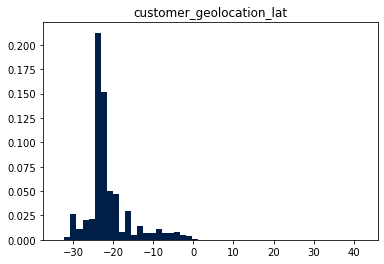

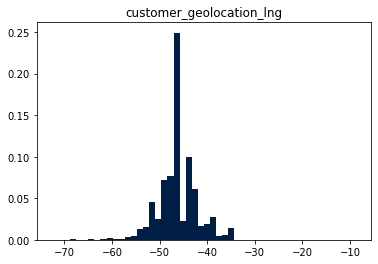

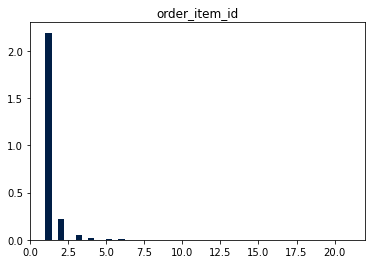

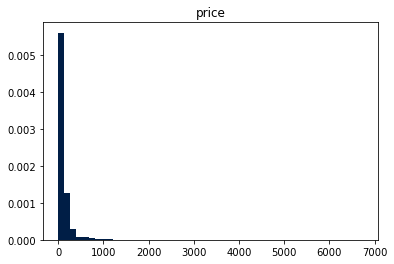

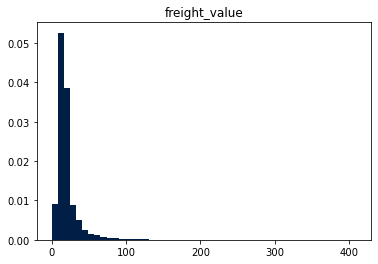

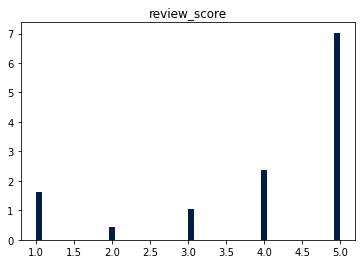

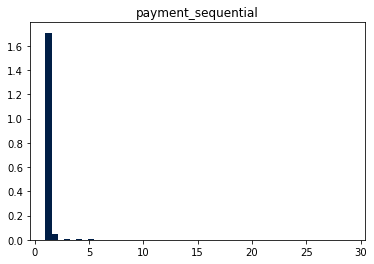

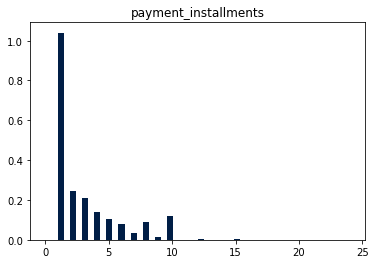

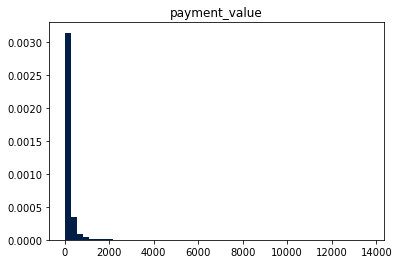

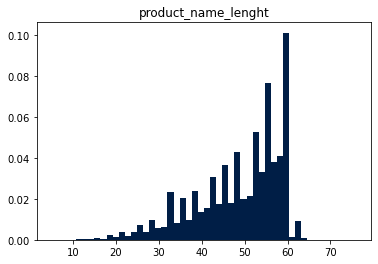

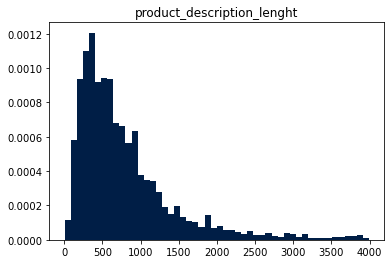

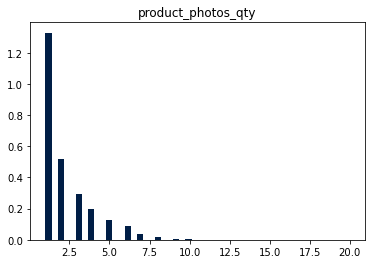

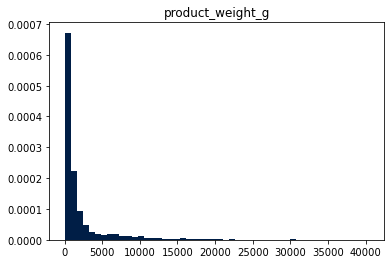

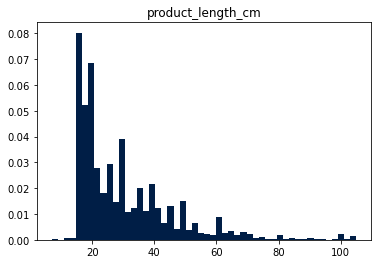

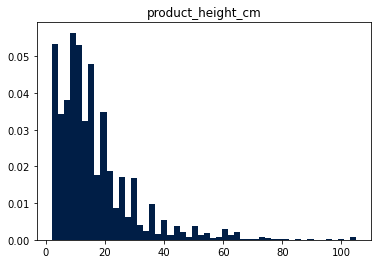

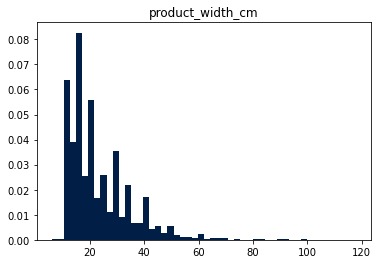

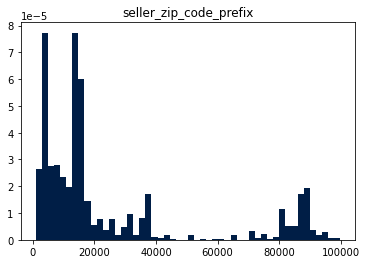

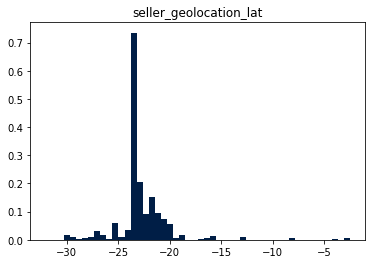

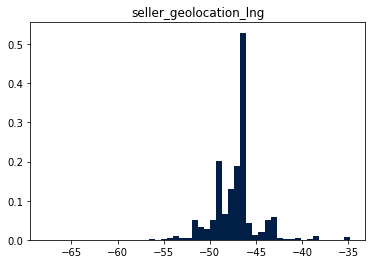

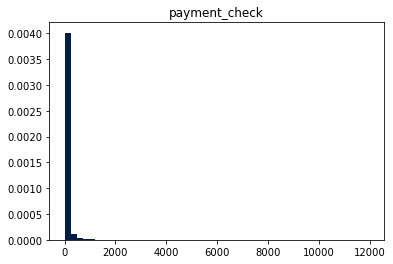

In [97]:
# Looking distributions

numerical_var = list(data.select_dtypes('float').columns)

for var in numerical_var:
    plt.figure()
    plt.hist(data[var], density=True, bins=50, color='#001E46', edgecolor='none')
    plt.title(var)
    plt.show()

### b. Dates

In [98]:
date_columns = list(data.select_dtypes('datetime64').columns)

In [99]:
for col in date_columns:
    print("Variable : {}".format(col))
    print("Min : {}".format(data[col].min()))
    print("Max : {}".format(data[col].max()))
    print("Mean : {}".format(data[col].mean()))
    print("Median : {}".format(data[col].median()))
    print("----------------------------------------------")

Variable : order_purchase_timestamp
Min : 2016-09-04 21:15:19
Max : 2018-10-17 17:30:18
Mean : 2017-12-30 04:00:24.559636736
Median : 2018-01-17 17:57:56.500000
----------------------------------------------
Variable : order_delivered_carrier_date
Min : 2016-10-08 10:34:01
Max : 2018-09-11 19:48:28
Mean : 2018-01-03 17:52:23.945324544
Median : 2018-01-23 20:43:19
----------------------------------------------
Variable : order_delivered_customer_date
Min : 2016-10-11 13:46:32
Max : 2018-10-17 13:22:46
Mean : 2018-01-13 06:29:34.791693056
Median : 2018-02-01 19:16:53
----------------------------------------------
Variable : order_estimated_delivery_date
Min : 2016-09-30 00:00:00
Max : 2018-11-12 00:00:00
Mean : 2018-01-23 00:31:38.941182208
Median : 2018-02-14 00:00:00
----------------------------------------------
Variable : shipping_limit_date
Min : 2016-09-19 00:15:34
Max : 2020-04-09 22:35:08
Mean : 2018-01-06 07:26:40.064649216
Median : 2018-01-25 11:57:47.500000
-------------------

In [100]:
# Dates should be between 2016 and 2018, for the variable shipping_limit_date we have values above 2018. Let's check it

data[data['shipping_limit_date'] > pd._libs.tslibs.timestamps.Timestamp('2018-12-31 23:59:59')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_check
5056,22e922696a7d1ab9a19c6b702fedc387,b030929cf3b8c3370ea8c611f9ccb32e,71905,brasilia,DF,NaN,NaN,9c94a4ea2f7876660fa6f1b59b69c8e6,shipped,2017-03-14 19:23:22,2017-03-14 19:23:22,2017-03-16 14:31:15,NaT,2017-08-04,1.0,282b126b2354516c5f400154398f616d,7a241947449cc45dbfda4f9d0798d9d0,2020-02-03 20:23:22,75.99,14.70,89ca32f678121dc844cafc2b4b2c73a2,1.0,NaN,Não recebi até hoje o produto depois de mais d...,2017-05-17,2017-05-17 22:04:19,1.0,boleto,1.0,90.69,housewares,48.0,2396.0,2.0,3700.0,20.0,20.0,20.0,37590.0,jacutinga,MG,-22.288147,-46.611901,0.000000e+00
5071,b279a1d441c73c1974d7a63618855aa0,3977f83a14549e6265bcded84e92ee80,21210,rio de janeiro,RJ,-22.843731,-43.302427,13bdf405f961a6deec817d817f5c6624,canceled,2017-03-16 02:30:51,2017-03-16 02:30:51,NaT,NaT,2017-08-08,1.0,96ea060e41bdecc64e2de00b97068975,7a241947449cc45dbfda4f9d0798d9d0,2020-02-05 03:30:51,69.99,14.66,bacc1646cb86b3bb80da5e0bc79b6f69,1.0,NaN,NaN,2017-08-11,2017-08-11 16:52:36,1.0,boleto,1.0,84.65,housewares,45.0,1875.0,4.0,5150.0,70.0,9.0,40.0,37590.0,jacutinga,MG,-22.288147,-46.611901,1.421085e-14
5078,6357fffb5704244d552615bbfcea1442,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,-20.799615,-49.415358,c2bb89b5c1dd978d507284be78a04cb2,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,1.0,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,6afeab17c60f9f9402bbf93abdce63e3,5.0,NaN,NaN,2017-06-10,2017-06-12 13:24:30,1.0,credit_card,15.0,322.86,housewares,58.0,914.0,5.0,15000.0,35.0,30.0,25.0,37590.0,jacutinga,MG,-22.288147,-46.611901,1.614300e+02
5079,6357fffb5704244d552615bbfcea1442,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,-20.799615,-49.415358,c2bb89b5c1dd978d507284be78a04cb2,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,2.0,87b92e06b320e803d334ac23966c80b1,7a241947449cc45dbfda4f9d0798d9d0,2020-04-09 22:35:08,99.99,61.44,6afeab17c60f9f9402bbf93abdce63e3,5.0,NaN,NaN,2017-06-10,2017-06-12 13:24:30,1.0,credit_card,15.0,322.86,housewares,58.0,914.0,5.0,15000.0,35.0,30.0,25.0,37590.0,jacutinga,MG,-22.288147,-46.611901,1.614300e+02


All values are from the same seller. The limit date is surprising but possible (the seller gave on purpose a date far to respect it ?)

### c. Categorical

In [101]:
categ_var = ['customer_city', 'customer_state', 
             'order_status', 'payment_type', 
             'product_category_name', 'seller_city', 
             'seller_state']

In [102]:
for var in categ_var:
    print("Variable : {}".format(var))
    print(data[var].unique())
    print("----------------------------------------------")

Variable : customer_city
['franca' 'santarem' 'nova santa rita' ... 'cha grande' 'livramento'
 'tangara']
----------------------------------------------
Variable : customer_state
['SP' 'PA' 'RS' 'RJ' 'SC' 'MG' 'MT' 'BA' 'ES' 'PR' 'MS' 'CE' 'RN' 'TO'
 'MA' 'GO' 'PI' 'PE' 'DF' 'PB' 'AL' 'SE' 'RO' 'AC' 'AM' 'AP' 'RR']
----------------------------------------------
Variable : order_status
['delivered' 'shipped' 'invoiced' 'canceled' 'processing' 'unavailable'
 'created' 'approved']
----------------------------------------------
Variable : payment_type
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined' nan]
----------------------------------------------
Variable : product_category_name
['office_furniture' 'furniture_decor' 'auto' 'sports_leisure'
 'furniture_living_room' 'baby' 'housewares'
 'kitchen_dining_laundry_garden_furniture' 'home_confort' 'bed_bath_table'
 'toys' 'home_comfort_2' 'cool_stuff' 'computers_accessories'
 'musical_instruments' 'consoles_games' 'watches_gifts' 

In [103]:
# For city variables we can't check manually given the number of occurences
# but we can normalize text to ensure we don't have the same city written in different ways

print('Without normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].unique())))
print('Occurences of seller_city : {}'.format(len(data['seller_city'].unique())))
print('---------------------------------------------')
print('With normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].str.strip().str.lower().unique())))
print('Occurences of seller_city : {}'.format(len(data['seller_city'].str.strip().str.lower().unique())))

Without normalization
Occurences of customer_city : 4119
Occurences of seller_city : 612
---------------------------------------------
With normalization
Occurences of customer_city : 4119
Occurences of seller_city : 612


It doesn't change anything

For other variables, it seems coherent

## III - Missing values

In [104]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat            317
customer_geolocation_lng            317
order_approved_at                   176
order_delivered_carrier_date       2074
order_delivered_customer_date      3397
order_item_id                       830
product_id                          830
seller_id                           830
shipping_limit_date                 830
price                               830
freight_value                       830
review_id                          1622
review_score                       1622
review_comment_title             104514
review_comment_message            68705
review_creation_date               1622
review_answer_timestamp            1622
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
product_category_name              2528
product_name_lenght                2528
product_description_lenght         2528
product_photos_qty                 2528


We can fix :
- location looking to correspondings zip codes manually
- for reviews, creation of 'not applicable'
- for orders dates, creation of 'not applicable'
- payment, only very few missing values

We probably can't fix (except maybe later with imputation) :
- missing times informations
- missing products informations
- other sellers missing informations

### a. Reviews

In [105]:
# When we have a NaN value for reviews variables, we can assume it means the customer didn't make a review. 
# We will replace NaN by 'Not applicable'

review_var = ['review_id', 'review_score', 
              'review_comment_title', 'review_comment_message', 
              'review_creation_date', 'review_answer_timestamp']

for var in review_var:
    data.loc[data[var].isna(), var] = 'Not applicable'

In [106]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat          317
customer_geolocation_lng          317
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
product_photos_qty               2528
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
seller_zip_code_prefix            830
seller_city                       830
seller_state                      830
seller_geolo

### b. Payment

In [107]:
# Looking missing values
data[data['payment_sequential'].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_check
105955,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,-20.585751,-47.863693,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,1.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,6916ca4502d6d3bfd39818759d55d536,1.0,Not applicable,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810.0,curitiba,PR,-25.507014,-49.275963,NaN
105956,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,-20.585751,-47.863693,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,2.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,6916ca4502d6d3bfd39818759d55d536,1.0,Not applicable,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810.0,curitiba,PR,-25.507014,-49.275963,NaN
105957,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,-20.585751,-47.863693,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,3.0,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,6916ca4502d6d3bfd39818759d55d536,1.0,Not applicable,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,81810.0,curitiba,PR,-25.507014,-49.275963,NaN


In [108]:
# Given the few missing values, we can drop these rows (which are all about the same order)
data.dropna(subset=['payment_sequential'], inplace=True)

In [109]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat          317
customer_geolocation_lng          317
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
product_photos_qty               2528
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
seller_zip_code_prefix            830
seller_city                       830
seller_state                      830
seller_geolocation_lat           1091
seller_geolocation_lng           1091
payment_check                     830
dtype: int64

### c. Orders

We have missing values for order_delivered_customer_date and order_delivered_carrier_date. This could be because the order hasn't been delivered, let's check

In [110]:
# We create 2 dfs with missing values for simplification of next steps
missing_order_delivered_carrier_date = data[data['order_delivered_carrier_date'].isna()]
missing_order_delivered_customer_date = data[data['order_delivered_customer_date'].isna()]

# Looking status for missing values
print(missing_order_delivered_carrier_date['order_status'].unique())
print('')
print(missing_order_delivered_customer_date['order_status'].unique())

['invoiced' 'canceled' 'processing' 'unavailable' 'created' 'approved'
 'delivered']

['shipped' 'invoiced' 'canceled' 'processing' 'unavailable' 'created'
 'delivered' 'approved']


In [111]:
# For order_delivered_carrier_date and we can assume it make sense we have NaN values if the order isn't delivered
# Let's check if we have delivered orders without values

missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_check
104718,afeb16c7f46396c0ed54acb45ccaaa40,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP,-23.082208,-47.203433,2aa91108853cecb43c84a5dc5b277475,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,1.0,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98,e945d1831a3d98008913fc31dcbb804d,5.0,Not applicable,Not applicable,2017-10-17 00:00:00,2017-10-17 10:56:02,1.0,credit_card,1.0,193.98,furniture_decor,54.0,984.0,2.0,7000.0,16.0,50.0,55.0,87240.0,terra boa,PR,-23.771858,-52.448328,0.0
117334,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,-30.033566,-51.162560,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,1.0,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.0,15.00,4e755f114e50d33b9ac6a56e0d7d3ea9,5.0,Not applicable,Not applicable,2017-06-25 00:00:00,2017-06-27 01:49:04,1.0,credit_card,4.0,194.00,sports_leisure,43.0,1873.0,2.0,900.0,26.0,26.0,26.0,5319.0,sao paulo,SP,-23.541812,-46.730687,0.0


In [112]:
# We have only 2 rows, we will delete them

index_list = missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered'].index

data.drop(index_list, inplace=True)

In [113]:
# For other values, we will create 'Not applicable'

data.loc[data['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = 'Not applicable'

In [114]:
# Same check for order_delivered_customer_date

missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,payment_check
37886,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,-23.166262,-47.746689,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,1.0,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2017-12-04 17:56:40,117.30,17.53,f48c6c944a5d52dcca8ac5c4ec417cf2,5.0,Not applicable,Chegou rápido tudo ok,2017-12-19 00:00:00,2017-12-19 04:15:39,1.0,credit_card,3.0,134.83,auto,53.0,555.0,1.0,4105.0,67.0,10.0,67.0,7112.0,guarulhos,SP,-23.468704,-46.516142,2.842171e-14
71918,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,-22.888249,-45.376194,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 17:15:12,139.00,19.07,25e11638a3d01a87e8e62338a39eee28,5.0,Not applicable,Not applicable,2018-07-11 00:00:00,2018-07-11 19:27:46,1.0,credit_card,3.0,158.07,watches_gifts,42.0,938.0,5.0,275.0,16.0,14.0,14.0,36407.0,conselheiro lafaiete,MG,-20.659212,-43.806927,0.000000e+00
71933,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,-22.822137,-47.270335,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,1.0,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 22:15:14,139.00,19.07,bb311d9562ecbefc8e4be756d8999892,5.0,Not applicable,Not applicable,2018-07-07 00:00:00,2018-07-10 11:38:13,1.0,credit_card,1.0,158.07,watches_gifts,42.0,938.0,5.0,275.0,16.0,14.0,14.0,36407.0,conselheiro lafaiete,MG,-20.659212,-43.806927,0.000000e+00
91315,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,-23.446492,-46.408626,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,1.0,a2a7efc985315e86d4f0f705701b342b,ed4acab38528488b65a9a9c603ff024a,2018-06-18 12:30:35,110.99,9.13,0d4c56af896dd6eb9de8edbaa1902d22,1.0,Péssimo,Comprei um produto de uma marca e recebi outro...,2018-06-16 00:00:00,2018-06-16 13:55:00,1.0,credit_card,5.0,120.12,computers_accessories,45.0,837.0,1.0,1133.0,16.0,15.0,20.0,8260.0,sao paulo,SP,-23.565855,-46.434938,1.421085e-14
110520,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,-23.691430,-46.382238,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,1.0,55bfa0307d7a46bed72c492259921231,343e716476e3748b069f980efbaa294e,2018-07-03 16:29:30,45.90,9.07,d055795a562efffefe47ef81e5435322,5.0,Muito bom,Adorei,2018-07-06 00:00:00,2018-07-06 20:30:17,1.0,credit_card,1.0,54.97,books_general_interest,43.0,838.0,1.0,550.0,26.0,7.0,36.0,13033.0,campinas,SP,-22.904937,-47.097085,0.000000e+00
111734,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,-23.293915,-48.057538,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,1.0,2167c8f6252667c0eb9edd51520706a1,0

In [115]:
# Delete rows and replace others by 'Not applicable'

index_list = list(missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered'].index)
index_list.remove(117334) # Already deleted above

data.drop(index_list, inplace=True)

data.loc[data['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = 'Not applicable'

### --> Voir si possible de remplacer les dates par l'estimé mais ça ne semble pas fonctionner avec les NaT (ça serait plus clean)

In [116]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat       317
customer_geolocation_lng       317
order_approved_at              176
order_item_id                  830
product_id                     830
seller_id                      830
shipping_limit_date            830
price                          830
freight_value                  830
product_category_name         2528
product_name_lenght           2528
product_description_lenght    2528
product_photos_qty            2528
product_weight_g               850
product_length_cm              850
product_height_cm              850
product_width_cm               850
seller_zip_code_prefix         830
seller_city                    830
seller_state                   830
seller_geolocation_lat        1091
seller_geolocation_lng        1091
payment_check                  830
dtype: int64

Remaining NaN are actual missing values so we can't manually treat them, we will impute or delete them later for our machine learning algorithm

# Notes

The objective would be to extract informations for unique customers (with customer_unique_id) with this dataframe, a lot a feature engineering will be necessary. Some ideas for now :
- Number of orders
- Time for approval of order (diff with purchase time)
- Time for delivery (carrier / customer) of order (diff with purchase time)
- Time for estimated delivery (diff with purchase time)
- Difference estimated / real time of delivery
- Average number of items per order
- Number of orders with the same seller
- Orders with shipping limit overdue
- Average price of orders
- Average freight_value of orders
- % of reviews (creation of var review if review_score not NaN / number of orders)
- Average review score given
- % of comments on review
- Average number of payment_sequential
- Average time of review (diff with delivery time)
- Favorite payment_type
- Average number of payment_installments
- Average payment_value (same as price + freight value ?)
- Favorite product_category_name

Interest of dimensions of objects ?
Interest of location of seller ?

Should look too if a customer changed location, creation of a var moving ?